In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Customer_data.csv")

In [4]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


# understanding the basic info

In [6]:
data['STORE_NBR'].nunique()

272

In [7]:
data['PROD_NAME'].nunique()

114

In [8]:
data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [10]:
data['BRAND'].nunique()

21

In [11]:
data['BRAND'].value_counts()

KETTLE        41288
SMITHS        31823
DORITOS       28145
PRINGLES      25102
RRD           17779
WOOLWORTHS    14757
INFUZIONS     14201
THINS         14075
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: BRAND, dtype: int64

In [12]:
data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [14]:
data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101988
Budget         93157
Premium        69689
Name: PREMIUM_CUSTOMER, dtype: int64

In [15]:
data['Month'] = pd.to_datetime(data['DATE']).dt.month

In [22]:
data['Month'] = data['Month'].astype('str')

In [25]:

names = {"1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun","7":"july","8":"Aug",
        "9":"Sep","10":"Oct","11":"Nov","12":"Dec"}


data['Month']= data['Month'].apply(lambda x:names[x])

In [26]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,Oct
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,Sep
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,Mar
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,Mar
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,Nov


In [35]:
monthly_sales = data.groupby('Month')['TOT_SALES'].sum()

In [36]:
monthly_sales = monthly_sales.to_frame().reset_index()

In [30]:
monthly_sales


,Month,TOT_SALES
0,Apr,159845.10
1,Aug,158081.05
2,Dec,167913.40
3,Feb,150665.00
4,Jan,162642.30
5,Jun,160538.60
6,Mar,166265.20
7,May,156717.65
8,Nov,160233.70
9,Oct,164415.70


<AxesSubplot:xlabel='Month', ylabel='TOT_SALES'>

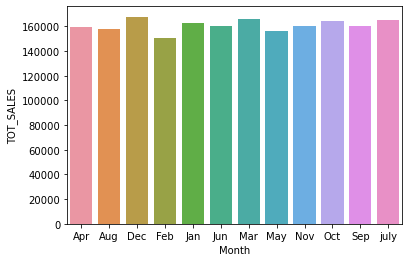

In [38]:
import seaborn as sns
sns.barplot(x= monthly_sales['Month'], y=monthly_sales['TOT_SALES'])

# which product is sold the most in december ? in that which brand products are sold

In [40]:
dec_data = data.loc[data['Month'] == 'Dec']

In [41]:
dec_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,Dec
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,Dec
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget,Dec
10,1010,2018-12-14,1,11,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,300,OLD,YOUNG SINGLES/COUPLES,Mainstream,Dec
13,1011,2018-12-01,1,14,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,OLDER SINGLES/COUPLES,Mainstream,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264785,272391,2018-12-07,272,270205,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135,KETTLE,YOUNG SINGLES/COUPLES,Mainstream,Dec
264826,2370581,2018-12-17,88,240317,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150,DORITOS,OLDER SINGLES/COUPLES,Budget,Dec
264827,2370581,2018-12-26,88,240318,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Budget,Dec
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,Dec


In [43]:
prodct_quty = dec_data.groupby('PROD_NAME')['PROD_QTY'].sum()

In [48]:
prodct_quty = prodct_quty.to_frame().reset_index()

In [49]:
prodct_quty.sort_values('PROD_QTY', ascending=False)

,PROD_NAME,PROD_QTY
101,Twisties Chicken270g,610
33,Kettle Mozzarella Basil & Pesto 175g,601
92,Thins Chips Light& Tangy 175g,578
40,Kettle Tortilla ChpsBtroot&Ricotta 150g,575
16,Doritos Corn Chips Nacho Cheese 170g,574
...,...,...
64,RRD Salt & Vinegar 165g,208
4,Cheetos Chs & Bacon Balls 190g,206
46,Natural ChipCo Hony Soy Chckn175g,204
62,RRD Pc Sea Salt 165g,203


In [51]:
brand_quty = dec_data.groupby('BRAND')['PROD_QTY'].sum()

In [52]:
brand_quty = brand_quty.to_frame().reset_index()

In [53]:
brand_quty.sort_values('PROD_QTY', ascending=False)

,BRAND,PROD_QTY
9,KETTLE,6839
14,SMITHS,5194
5,DORITOS,4634
12,PRINGLES,4045
13,RRD,2781
20,WOOLWORTHS,2453
16,THINS,2383
8,INFUZIONS,2296
4,COBS,1707
18,TWISTIES,1699


# which product has generated the highest revenue

In [56]:
tot_sales_dec = dec_data.groupby(dec_data['PROD_NAME'])['TOT_SALES'].sum()

In [57]:
tot_sales_dec = tot_sales_dec.to_frame().reset_index()

In [58]:
tot_sales_dec.sort_values('TOT_SALES', ascending=False)

,PROD_NAME,TOT_SALES
33,Kettle Mozzarella Basil & Pesto 175g,3245.4
76,Smiths Crinkle Original 330g,3123.6
86,Smiths Crnkle Chip Orgnl Big Bag 380g,3097.5
6,Cheezels Cheese 330g,3083.7
35,Kettle Sea Salt And Vinegar 175g,3029.4
...,...,...
105,WW Crinkle Cut Original 175g,431.8
109,WW Sour Cream &OnionStacked Chips 160g,410.4
90,Sunbites Whlegrn Crisps Frch/Onin 90g,399.5
113,Woolworths Mild Salsa 300g,373.5


# which life stage people are at which premium category

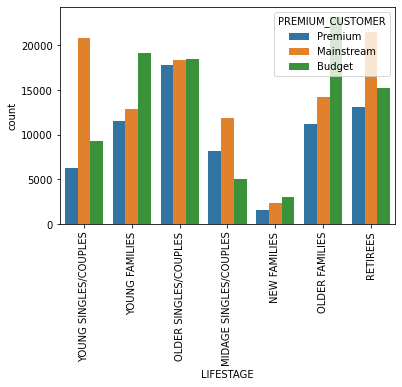

In [60]:
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data= data)
plt.xticks(rotation=90)
plt.show()

# Analyse the monthly sales of each store

In [64]:
montly_sales = data.groupby(['STORE_NBR','Month'])['TOT_SALES'].sum()

In [65]:
montly_sales

STORE_NBR  Month
1          Apr      192.9
           Aug      176.1
           Dec      189.6
           Feb      225.4
           Jan      154.8
                    ...  
272        May      314.6
           Nov      376.2
           Oct      430.6
           Sep      304.7
           july     433.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [66]:
montly_sales = montly_sales.to_frame().reset_index()

In [67]:
montly_sales

,STORE_NBR,Month,TOT_SALES
0,1,Apr,192.9
1,1,Aug,176.1
2,1,Dec,189.6
3,1,Feb,225.4
4,1,Jan,154.8
...,...,...,...
3164,272,May,314.6
3165,272,Nov,376.2
3166,272,Oct,430.6
3167,272,Sep,304.7


# Understanding specific store

In [69]:
store70 = montly_sales.loc[montly_sales['STORE_NBR'] == 70]

In [70]:
store70

,STORE_NBR,Month,TOT_SALES
807,70,Apr,790.4
808,70,Aug,860.8
809,70,Dec,699.6
810,70,Feb,710.6
811,70,Jan,891.8
812,70,Jun,663.0
813,70,Mar,763.2
814,70,May,718.4
815,70,Nov,787.2
816,70,Oct,789.6


<AxesSubplot:xlabel='Month', ylabel='TOT_SALES'>

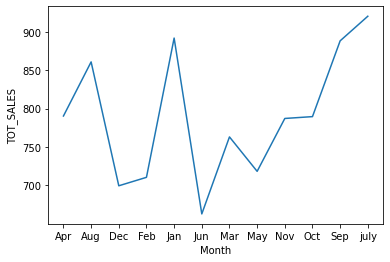

In [71]:
sns.lineplot(store70['Month'], store70['TOT_SALES'])